# Test draw multinetX

### Package importation

In [1]:
import numpy as np #  to use matrix
import matplotlib.pyplot as plt # to use plot
import networkx as nx # to use graphs
import multinetx as mx # to use multinet
import math # to use floor
import matplotlib.cm as cmx # to use cmap (for data color values)
import matplotlib.colors as colors # to use cmap (for data color values)
import matplotlib.cbook as cb # to test if an object is a string

from mpl_toolkits.mplot3d import Axes3D # to use 3D plot

In [2]:
%matplotlib notebook

### Test Niko's multinet

In [3]:
# Create multinet
N = 10

adj_block = mx.lil_matrix(np.zeros((N*4,N*4)))

adj_block[0  :  N ,   N:2*N] = np.identity(N)   # L_12
adj_block[0  :  N , 2*N:3*N] = np.random.poisson(0.005,size=(N,N))   # L_13
adj_block[0  :  N , 3*N:4*N] = np.random.poisson(0.006,size=(N,N))   # L_34
adj_block[3*N:4*N , 2*N:3*N] = np.random.poisson(0.008,size=(N,N))   # L_14
adj_block += adj_block.T
adj_block[adj_block>1] = 1

g1 = mx.erdos_renyi_graph(N,0.3,seed=218)
g2 = mx.erdos_renyi_graph(N,0.2,seed=211)
g3 = mx.erdos_renyi_graph(N,0.1,seed=208)

mg = mx.MultilayerGraph(list_of_layers=[g1,g2,g3,g1],
						inter_adjacency_matrix=adj_block)

mg.set_edges_weights(inter_layer_edges_weight=5)

mg.set_intra_edges_weights(layer=0,weight=1)
mg.set_intra_edges_weights(layer=1,weight=2)
mg.set_intra_edges_weights(layer=2,weight=3)
mg.set_intra_edges_weights(layer=3,weight=4)


<IPython.core.display.Javascript object>


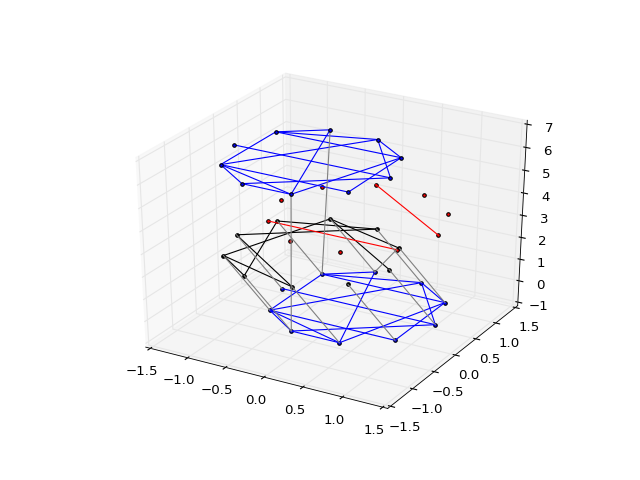

In [4]:
# Create the figure
fig = plt.figure()
# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

p = mx.fruchterman_reingold_layout(mg.get_layer(0))

pos = mx.get_position3D(mg,
					  x_shift=0.3, z_shift = 2)

intra_c = ['b','k','r','b']
inter_c = 'grey'
layer_c = ['b','k','r','b']

mx.FigureByLayer(mg , pos, ax, intra_edge_color=intra_c,node_color=layer_c, node_size=10)
#ax.axis('off')

### Test ring

In [5]:
N = 10
mg = mx.ring(N,2)

<IPython.core.display.Javascript object>


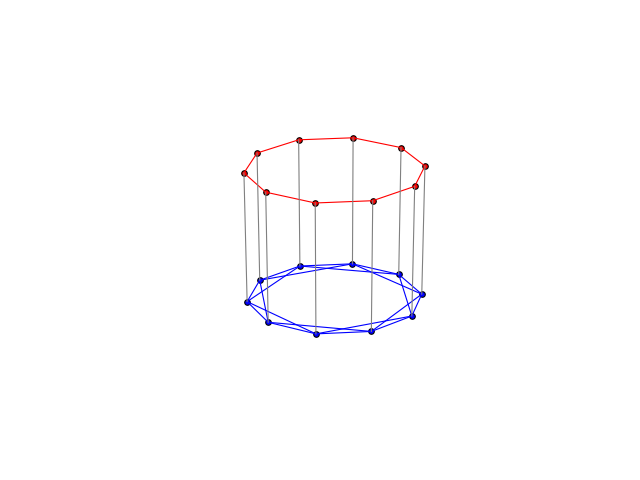

(-1.5, 1.5, -1.5, 1.5)

In [6]:
# Create the figure
fig = plt.figure()
# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

pos = mx.get_position3D(mg)


intra_c = ['b','r']
inter_c = 'grey'
layer_c = ['b','r']

mg.set_edges_weights(inter_layer_edges_weight=1, intra_layer_edges_weight=1)
edge_color=[mg[a][b]['weight'] for a,b in mg.edges()]


mx.FigureByLayer(mg, pos, ax, intra_edge_color=intra_c,node_color=layer_c, inter_edge_color=inter_c)
ax.axis('off')

### Test : layer with different number of nodes

In [7]:
N1 = 10
g1 = nx.cycle_graph(N1)
N2 = 2*N1
g2 = nx.cycle_graph(N2)

adj_block = mx.lil_matrix(np.zeros((N1+N2,N1+N2)))

for i in range(N1):
    adj_block[i,N1+2*i] = 1

adj_block += adj_block.T

mg = mx.MultilayerGraph(list_of_layers=[g1,g2],inter_adjacency_matrix=adj_block)

<IPython.core.display.Javascript object>


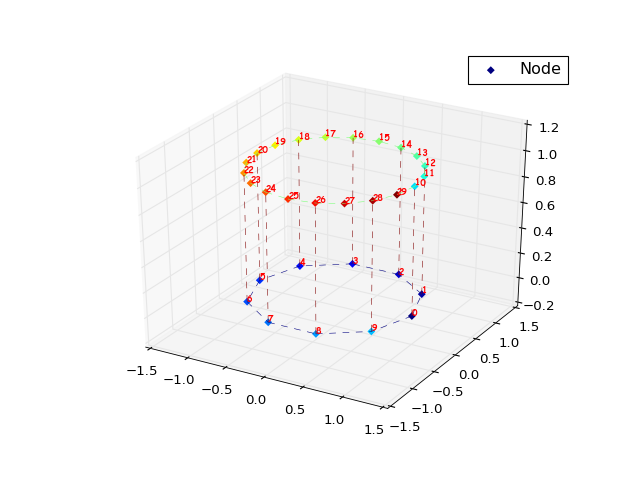

In [8]:
# Create the figure
fig = plt.figure()
# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

pos = mx.get_position3D(mg)

mg.set_intra_edges_weights(layer=0,weight=1)
mg.set_intra_edges_weights(layer=1,weight=2)

mg.set_edges_weights(inter_layer_edges_weight=3)

edge_color=[mg.edges.get((a,b))['weight'] for a,b in mg.edges()]
node_color=[i for i in mg.nodes]
#node_color=[np.random.randint(1,100) for i in mg.nodes]
#node_color=['red' for i in mg.nodes]
#labels = dict((n,'=)') for n in mg.nodes)

mx.Figure3D(mg, pos, ax, edge_color=edge_color, node_color=node_color, 
         node_shape = 'D', edge_linewidth = 0.5, node_linewidth = 0,
         edge_style = 'dashed', label = 'Node', with_labels = True,
         font_size = 8, font_color = 'red', font_weight = 'heavy', 
         font_family = 'fantasy')

ax.legend(scatterpoints=1)

In [ ]:
# Create the figure
fig = plt.figure()
# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

pos = mx.get_position3D(mg)
edge_list = [(0, 1),(0, 10),(0, 9),(1, 2),(1, 12),(2, 3),(2, 14),(3, 16),(3, 4),(4, 18),(4, 5),(5, 20),(5, 6),(6, 22),(6, 7),(7, 8),(7, 24)]
edge_color = [np.random.randint(1,100) for i in edge_list]
node_list = [0,2,4,6,8,10,12,14,16,18,20]
node_color = [0,2,4,6,8,10,12,14,16,18,20]
mx.Figure3D(mg, pos, ax, node_list=node_list, node_color=node_color, edge_list=edge_list, edge_color = edge_color)

### Test : integration of fnh-k code

In [9]:
from read_matrix import read_matrix

<IPython.core.display.Javascript object>


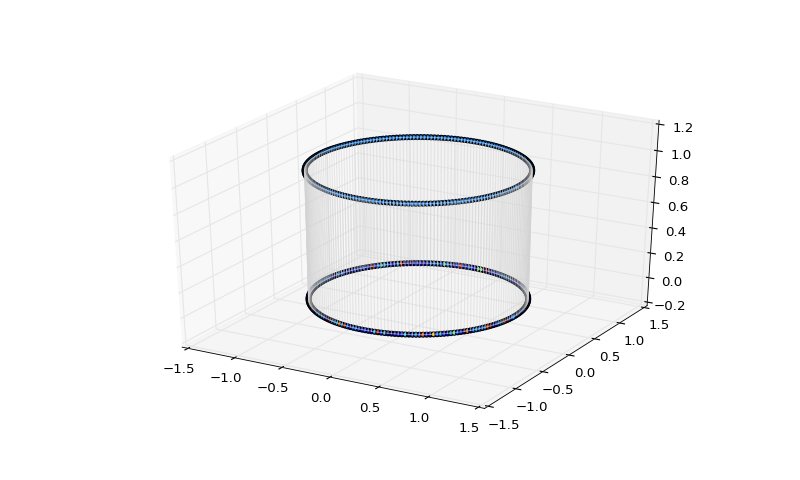

In [10]:
N = 200
R = 1
mg = mx.ring(N,R)

# Create the figure
fig = plt.figure(figsize=(10, 6))
#fig = plt.figure()
# Create 3D axes
ax = fig.add_subplot(111, projection='3d')
states = read_matrix("/home/icarrasco/fnh_k/fnh_k_extended/data/fnh_k_D0.001_gamma1_Ksyn0_R1_states.out")

t = 600
neuron_color = states[t,0:N]
glias_color = [np.mean(neuron_color) for i in range(N)]
node_color = np.concatenate((neuron_color,glias_color))
#node_color = [0 for i in range(mg.num_nodes)]

#Figure3D(mg, node_color=node_color, node_size=60)
#edge_color = [np.random.randint(1,100) for i in mg.edges]
mx.Figure3D(mg,node_color=node_color, node_size=20, edge_color='lightgray',edge_alpha=0.5)

In [11]:
N = 1000
R = 350
mg = mx.ring(N,R)

In [12]:
# Create the figure
#fig = plt.figure(figsize=(10, 6))
#fig = plt.figure()
# Create 3D axes
#ax = fig.add_subplot(111, projection='3d')
states = read_matrix("/home/icarrasco/fnh_k/fnh_k_crossed/data/fnh_k_N1000_R350_D0_Kdiff0.5_Ksyn0.5_states.out")

t = 600
neuron_color = states[t,:]
glias_color = [np.mean(neuron_color) for i in range(N)]
node_color = np.concatenate((neuron_color,glias_color))

#mx.Figure3D(mg)
#mx.Figure3D(mg,node_color=node_color, node_size=20, edge_color='lightgray',edge_alpha=0.5)

### Test : display a network of layer

In [13]:
# Create multinet
N = 10

adj_block = mx.lil_matrix(np.zeros((N*4,N*4)))

adj_block[0  :  N ,   N:2*N] = np.identity(N)   # L_12
adj_block[0  :  N , 2*N:3*N] = np.random.poisson(0.005,size=(N,N))   # L_13
adj_block[0  :  N , 3*N:4*N] = np.random.poisson(0.006,size=(N,N))   # L_34
adj_block[3*N:4*N , 2*N:3*N] = np.random.poisson(0.008,size=(N,N))   # L_14
adj_block += adj_block.T
adj_block[adj_block>1] = 1

g1 = mx.erdos_renyi_graph(N,0.3,seed=218)
g2 = mx.erdos_renyi_graph(N,0.2,seed=211)
g3 = mx.erdos_renyi_graph(N,0.1,seed=208)

mg = mx.MultilayerGraph(list_of_layers=[g1,g2,g3,g1],
						inter_adjacency_matrix=adj_block)

mg.set_edges_weights(inter_layer_edges_weight=5)

mg.set_intra_edges_weights(layer=0,weight=1)
mg.set_intra_edges_weights(layer=1,weight=2)
mg.set_intra_edges_weights(layer=2,weight=3)
mg.set_intra_edges_weights(layer=3,weight=4)

<IPython.core.display.Javascript object>


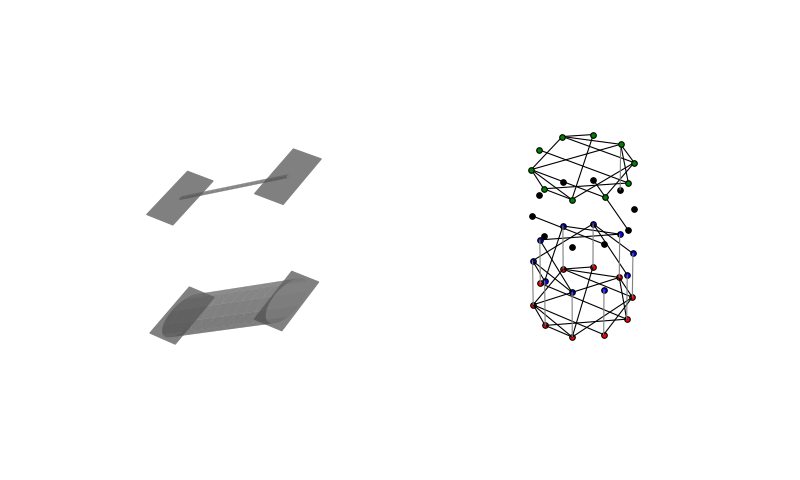

(-1.5, 1.5, -1.5, 1.5)

In [14]:
from matplotlib.patches import Rectangle
import mpl_toolkits.mplot3d.art3d as art3d
import matplotlib as mpl

fig = plt.figure(figsize=(10, 6))
#fig = plt.figure()
# Create 3D axes
ax = fig.add_subplot(121, projection='3d')
pos_layer = []
for l in range(4):
    if l % 2 == 0:
        signe = -1
    else: 
        signe = 1
    pos_layer.append(np.array([signe*1,0.1,2*l,0.5,0.5]))
            
mx.layerNetwork(mg, pos_layer = pos_layer, weight = True)
ax.axis('off')
ax = fig.add_subplot(122, projection='3d')
mx.FigureByLayer(mg, node_color=['r','b','k','g'])
ax.axis('off')


<IPython.core.display.Javascript object>


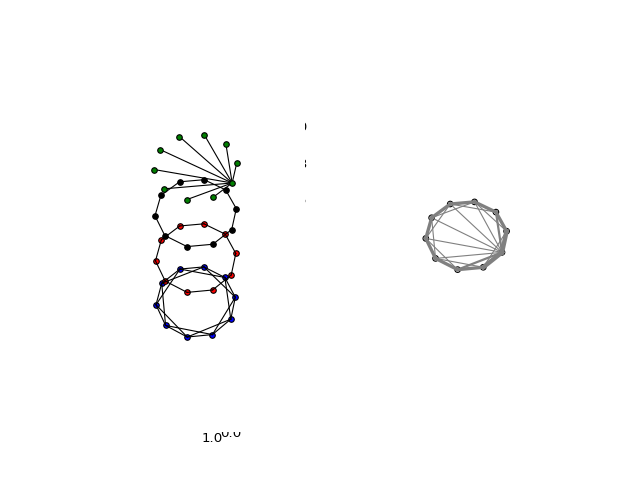

(-1.5, 1.5, -1.5, 1.5)

In [15]:
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')

N = 10

g1 = nx.cycle_graph(N)

R = 2
for glia in range(0,N):
        for r in range(1,R+1):
            k = glia + r
            if k > N - 1:
                k = k - N
            g1.add_edge(glia,k)
            k = glia - r
            if k < 0:
                k = k + N
            g1.add_edge(glia,k)


g2 = nx.cycle_graph(N)


g3 = nx.cycle_graph(N)


g4 = nx.star_graph(N-1)

pos = [np.array([0,0,0]),np.array([1,0,0]),np.array([1,1,0]),
       np.array([0,1,0]),np.array([0.5,0.5,0])]
mg = mx.MultilayerGraph(list_of_layers=[g1,g2,g3,g4])
#mg = ring(5,1)

ax = fig.add_subplot(121, projection='3d')
mx.FigureByLayer(mg, node_color=['b','r','k','g'])
ax.set_axis_off()
ax.axis('off')

ax = fig.add_subplot(122, projection='3d')
mx.projectionDisplay(mg)#, pos = pos)
ax.axis('off')

### Test study

In [16]:
N = 10
R = 1
mg = mx.ring(N,R)
adj_block = mx.lil_matrix(np.zeros((N*4,N*4)))

adj_block[0  :  N ,   N:2*N] = np.identity(N)   # L_12
adj_block[0  :  N , 2*N:3*N] = np.random.poisson(0.005,size=(N,N))   # L_13
adj_block[0  :  N , 3*N:4*N] = np.random.poisson(0.006,size=(N,N))   # L_34
adj_block[3*N:4*N , 2*N:3*N] = np.random.poisson(0.008,size=(N,N))   # L_14
adj_block += adj_block.T
adj_block[adj_block>1] = 1

g1 = mx.erdos_renyi_graph(N,0.3,seed=218)
g2 = mx.erdos_renyi_graph(N,0.2,seed=211)
g3 = mx.erdos_renyi_graph(N,0.1,seed=208)

mg = mx.MultilayerGraph(list_of_layers=[g1,g2,g3,g1],
						inter_adjacency_matrix=adj_block)

mg.set_edges_weights(inter_layer_edges_weight=1)

mg.set_intra_edges_weights(layer=0,weight=1)
mg.set_intra_edges_weights(layer=1,weight=1)
mg.set_intra_edges_weights(layer=2,weight=1)
mg.set_intra_edges_weights(layer=3,weight=1)

In [17]:
graph = mx.projection(mg)

In [18]:
print(mx.degreeCentrality(mg, inter_connexion = False, weight = True))
print(mx.degreeCentrality_proj(mg, edge_weight = False, weight = True))

[[  8.]
 [ 10.]
 [ 11.]
 [  9.]
 [ 10.]
 [  4.]
 [ 14.]
 [  9.]
 [ 10.]
 [  5.]]
{0: 0.4444444444444444, 1: 0.6666666666666666, 2: 0.6666666666666666, 3: 0.6666666666666666, 4: 0.5555555555555556, 5: 0.3333333333333333, 6: 0.6666666666666666, 7: 0.5555555555555556, 8: 0.5555555555555556, 9: 0.2222222222222222}


<IPython.core.display.Javascript object>


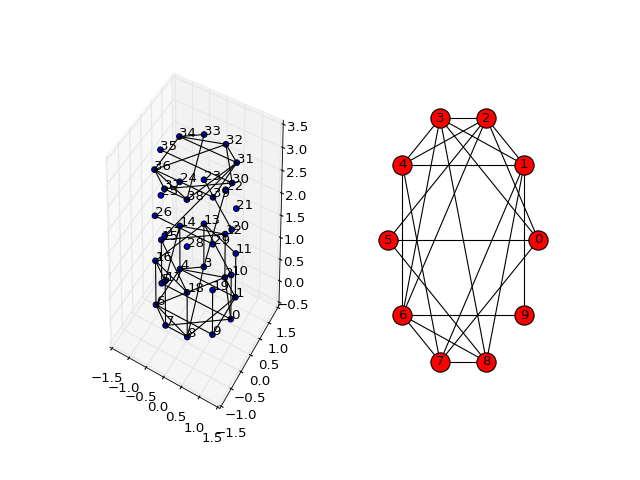

In [19]:
# Create 3D axes
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
mx.Figure3D(mg, with_labels=True,node_color='b')
plt.subplot(122)
nx.draw_shell(graph, with_labels = True)
plt.show()

<IPython.core.display.Javascript object>


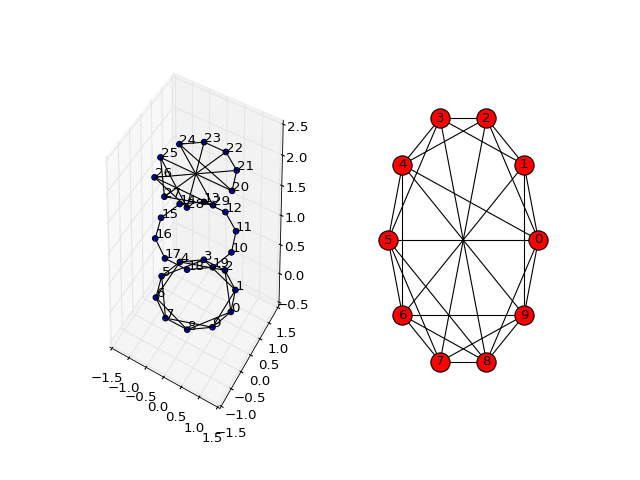

In [20]:
N = 10

g1 = nx.cycle_graph(N)

R = 2
for glia in range(0,N):
        for r in range(1,R+1):
            k = glia + r
            if k > N - 1:
                k = k - N
            g1.add_edge(glia,k)
            k = glia - r
            if k < 0:
                k = k + N
            g1.add_edge(glia,k)


g2 = nx.cycle_graph(N)

g3 = nx.petersen_graph()

mg = mx.MultilayerGraph(list_of_layers=[g1,g2,g3])

graph = mx.projection(mg)

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
mx.Figure3D(mg, with_labels=True,node_color='b')
plt.subplot(122)
nx.draw_shell(graph, with_labels = True)
plt.show()

In [21]:
print ("Triangles :")
print(mx.triangles_proj(mg))
print ("Transitivity :")
print(mx.transitivity_proj(mg))
print ("Clustering :")
print(mx.clustering_proj(mg))
print ("Average clustering :")
print(mx.average_clustering_proj(mg))
print ("Square clustering :")
print(mx.square_clustering_proj(mg))
print("Eigenvector centrality :")
print(mx.eigenvector_centrality_proj(mg))

Triangles :
{0: 7, 1: 4, 2: 4, 3: 4, 4: 7, 5: 8, 6: 8, 7: 5, 8: 8, 9: 8}
Transitivity :
0.484615384615
Clustering :
{0: 0.4666666666666667, 1: 0.4, 2: 0.4, 3: 0.4, 4: 0.4666666666666667, 5: 0.5333333333333333, 6: 0.5333333333333333, 7: 0.5, 8: 0.5333333333333333, 9: 0.5333333333333333}
Average clustering :
0.476666666667
Square clustering :
{0: 0.4, 1: 0.43859649122807015, 2: 0.3728813559322034, 3: 0.43859649122807015, 4: 0.4, 5: 0.3617021276595745, 6: 0.39325842696629215, 7: 0.45614035087719296, 8: 0.39325842696629215, 9: 0.3617021276595745}
Eigenvector centrality :
{0: 0.3371630872767898, 1: 0.2769074191062489, 2: 0.2686225928970438, 3: 0.27690741910624883, 4: 0.3371630872767898, 5: 0.34026203546533296, 6: 0.3407281176980732, 7: 0.2887572757367372, 8: 0.3407281176980731, 9: 0.34026203546533296}
